<h1><center>Chapter 3 <br>
    Task Report</center></h1>

### Import Library

The first step is to import the required libraries, which are Pandas, Numpy, MatplotLib, Seaborn, Scikit Learn, Scipy, etc.. 

In [127]:
import numpy as np 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn
from scipy import stats
from scipy.stats import norm, skew

### Load Data

Next, import the House Predict dataset using pandas. There are 2 dataset files, namely train and test dataset. Data Train will be used to build and evaluate models, while test data will be used for submission of answers in Kaggle. The data train has 1460 rows or observations and 81 columns, while the test data has 1459 rows or observations and 80 columns.

In [128]:
train = pd.read_csv('C:/Users/WINDOWS X/Downloads/train.csv')
test = pd.read_csv('C:/Users/WINDOWS X/Downloads/test.csv')

In [129]:
train.shape

(1460, 81)

In [130]:
test.shape

(1459, 80)

In [131]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Cleansing Data

The next step is cleansing the dataset. First delete the ID column, second check the data type of each variable, third check the missing value of each variable and impute the missing value, fourth check the outlier using standardized residuals regression.

#### Drop ID

In [132]:
#Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

#### Check Data Type

The data types of all variables are suitable except for some variables that contain years. However, because the analysis used is a cross section model, the variables containing years must be numeric rather than date time.

In [133]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

#### Missing Value Check

The next step is to check the missing value of each variable. There are many variables that have missing values. Even PoolQC, MiscFeature, Alley and Fence variables have missing values above 50%.

In [134]:
train.isnull().sum().head(40)

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley           1369
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
dtype: int64

In [135]:
train.isnull().sum().tail(40)

CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        0
BsmtHalfBath        0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
PoolQC           1453
Fence            1179
MiscFeature      1406
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice           0
dtype: int64

In [136]:
test.isnull().sum().head(40)

MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
Street             0
Alley           1352
LotShape           0
LandContour        0
Utilities          2
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Heating            0
HeatingQC          0
dtype: int64

In [137]:
test.isnull().sum().tail(40)

HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        2
BsmtHalfBath        2
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         1
TotRmsAbvGrd        0
Functional          2
Fireplaces          0
FireplaceQu       730
GarageType         76
GarageYrBlt        78
GarageFinish       78
GarageCars          1
GarageArea          1
GarageQual         78
GarageCond         78
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
PoolQC           1456
Fence            1169
MiscFeature      1408
MiscVal             0
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
dtype: int64

In [138]:
train2=train.drop(["SalePrice"],axis=1)
data_all=pd.concat([train2,test],axis=0)
data_na = (data_all.isnull().sum() / len(data_all)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
FireplaceQu,48.646797
LotFrontage,16.649538
GarageFinish,5.447071
GarageYrBlt,5.447071
GarageQual,5.447071
GarageCond,5.447071


#### Impute Missing Value

Furthermore, the variables contained in the missing value are imputed.

**PoolQC** : data description says NA means "No  Pool". That make sense, given the huge ratio of missing value (+99%) and majority of houses have no Pool at all in general. 

In [139]:
data_all["PoolQC"].value_counts()

Gd    4
Ex    4
Fa    2
Name: PoolQC, dtype: int64

In [140]:
data_all["PoolQC"] = data_all["PoolQC"].fillna("None")

**MiscFeature** : data description says NA means "no misc feature"


In [141]:
train["MiscFeature"].value_counts()

Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64

In [142]:
data_all["MiscFeature"] = data_all["MiscFeature"].fillna("None")

**Alley** : data description says NA means "no alley access"

In [143]:
train["Alley"].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [144]:
data_all["Alley"] = data_all["Alley"].fillna("None")

**Fence** : data description says NA means "no fence"

In [145]:
data_all["Fence"].value_counts()

MnPrv    329
GdPrv    118
GdWo     112
MnWw      12
Name: Fence, dtype: int64

In [146]:
data_all["Fence"] = data_all["Fence"].fillna("None")

**FireplaceQu** : data description says NA means "no fireplace"

In [147]:
data_all["FireplaceQu"] =data_all["FireplaceQu"].fillna("None")

**LotFrontage**: Because the area of each road connected to the house property is likely to have an area similar to other houses in the neighborhood and this variable also has many outliers, then we can fill in the missing values by the median LotFrontage of the neighborhood.

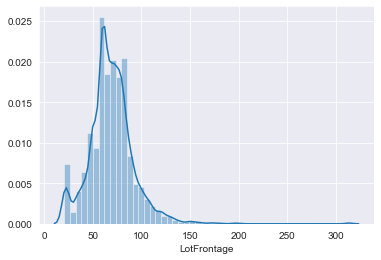

In [148]:
sns.distplot(data_all["LotFrontage"])

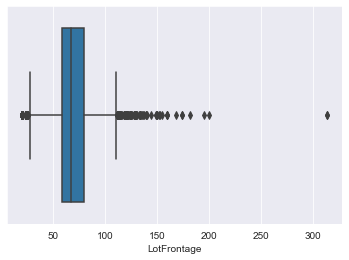

In [149]:
sns.boxplot(data_all["LotFrontage"])

In [150]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
data_all["LotFrontage"] = data_all.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

**GarageType, GarageFinish, GarageQual and GarageCond** : Replacing missing data with None

In [151]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    data_all[col] = data_all[col].fillna('None')

**GarageYrBlt, GarageArea and GarageCars** : Replacing missing data with 0 (Since No garage = no cars in such garage.)


In [152]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    data_all[col] = data_all[col].fillna(0)

**BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath** : missing values are likely zero for having no basement

In [153]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    data_all[col] = data_all[col].fillna(0)

**BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2** : For all these categorical basement-related features, NaN means that there is no  basement.


In [154]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    data_all[col] = data_all[col].fillna('None')

**MasVnrArea and MasVnrType** : NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type. 


In [155]:
data_all["MasVnrType"] = data_all["MasVnrType"].fillna("None")
data_all["MasVnrArea"] = data_all["MasVnrArea"].fillna(0)

**MSZoning (The general zoning classification)** :  'RL' is by far  the most common value.  So we can fill in missing values with 'RL'


In [156]:
data_all['MSZoning'] = data_all['MSZoning'].fillna(data_all['MSZoning'].mode()[0])

**Utilities** is imputed with their mode values.

In [157]:
data_all['Utilities'].value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

In [158]:
data_all['Utilities'] = data_all['Utilities'].fillna(data_all['Utilities'].mode()[0])

**Functional** : data description says NA means typical

In [159]:
data_all["Functional"] = data_all["Functional"].fillna("Typ")

**Electrical** : It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.


In [160]:
data_all['Electrical'] = data_all['Electrical'].fillna(data_all['Electrical'].mode()[0])

**KitchenQual**: Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent)  for the missing value in KitchenQual.


In [161]:
data_all['KitchenQual'] = train['KitchenQual'].fillna(data_all['KitchenQual'].mode()[0])

**Exterior1st and Exterior2nd** : Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string


In [162]:
data_all['Exterior1st'] = data_all['Exterior1st'].fillna(data_all['Exterior1st'].mode()[0])
data_all['Exterior2nd'] = data_all['Exterior2nd'].fillna(data_all['Exterior2nd'].mode()[0])

**SaleType** : Fill in again with most frequent which is "WD"

In [163]:
data_all['SaleType'] = data_all['SaleType'].fillna(data_all['SaleType'].mode()[0])

**MSSubClass** : Na most likely means No building class. We can replace missing values with None


In [164]:
data_all['MSSubClass'] =data_all['MSSubClass'].fillna("None")

There is no missing value in the data.

In [165]:
data_all.isnull().sum().head(40)

MSSubClass      0
MSZoning        0
LotFrontage     0
LotArea         0
Street          0
Alley           0
LotShape        0
LandContour     0
Utilities       0
LotConfig       0
LandSlope       0
Neighborhood    0
Condition1      0
Condition2      0
BldgType        0
HouseStyle      0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
RoofStyle       0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
MasVnrArea      0
ExterQual       0
ExterCond       0
Foundation      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
Heating         0
HeatingQC       0
dtype: int64

In [166]:
data_all.isnull().sum().tail(40)

HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
PoolQC           0
Fence            0
MiscFeature      0
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
dtype: int64

## Feature Enginer 1

**Adding one more important feature**

Since area related features are very important to determine house prices, we add one more feature which is the total area of basement, first and second floor areas of each house

In [167]:
# Adding total sqfootage feature 
data_all['TotalSF'] =data_all['TotalBsmtSF'] + data_all['1stFlrSF'] + data_all['2ndFlrSF']

In [168]:
train=pd.concat([data_all.iloc[:len(train),:],train.SalePrice],axis=1)

Make numerical variable for the benefit of EDA

In [169]:
num1=train.loc[:,train.dtypes=="int64"]
num2=train.loc[:,train.dtypes=="float64"]
num=pd.concat([num1,num2],axis=1)

## EDA

The dependent variable used is SalePrice. First we check the distribution of these variables using density plots and boxplots.

It can be seen from the density plot below that the SalePrice variable is not normally distributed and has positive skewness.

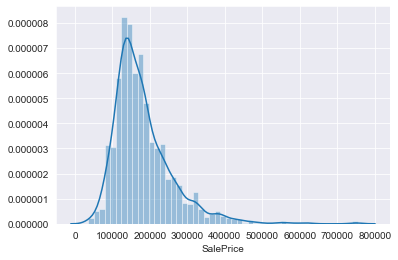

In [170]:
sns.distplot(train["SalePrice"])

In addition, based on the boxplot below it can be seen that there are quite a number of outliers on the SalePrice variable.

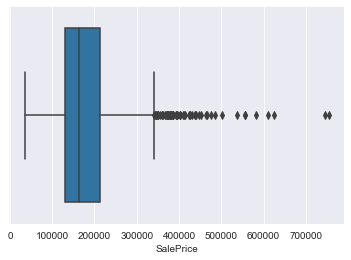

In [171]:
sns.boxplot(train["SalePrice"])

Next, we check the distribution of each independent variable with a numeric data type.

Based on the histogram and density plot below, it can be seen that none of the numerical independent variables are normally distributed.

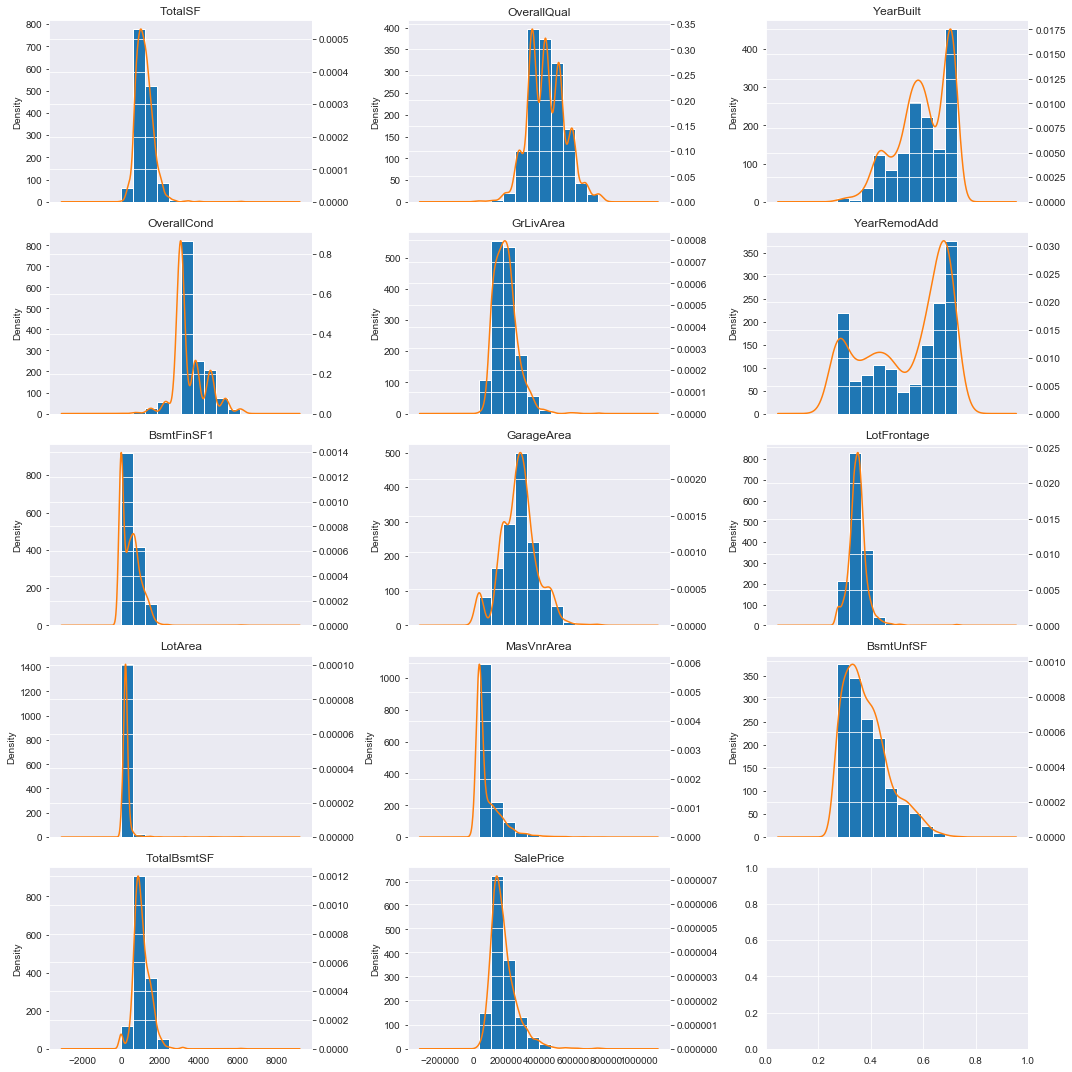

In [172]:
k = len(train[["TotalSF","OverallQual","YearBuilt","OverallCond","GrLivArea","YearRemodAdd","BsmtFinSF1","GarageArea","LotFrontage","LotArea","MasVnrArea","BsmtUnfSF","TotalBsmtSF","SalePrice"]].columns)
n = 3
m = (k - 1) // n + 1 ## Floor Division (also called Integer Division)
fig, axes = plt.subplots(m, n, figsize=(n * 5, m * 3))
for i, (name, col) in enumerate(train[["TotalSF","OverallQual","YearBuilt","OverallCond","GrLivArea","YearRemodAdd","BsmtFinSF1","GarageArea","LotFrontage","LotArea","MasVnrArea","BsmtUnfSF","TotalBsmtSF","SalePrice"]].iteritems()):
    r, c = i // n, i % n
    ax = axes[r, c]
    col.hist(ax=ax)
    ax2 = col.plot.kde(ax=ax, secondary_y=True, title=name)
    ax2.set_ylim(0)

fig.tight_layout()

Next, we see the relationship between numerical variables using a scater plot.

Based on the scatter plot below, it appears that there are several variables that correlate strongly enough both positively and negatively. Variables that correlate strongly with SalePrice variables are TotalSF, OverallQual, YearBuilt, GrLivArea, YearRemodAdd, and 1stFlrSF. Where these variables are positively correlated with SalePrice.

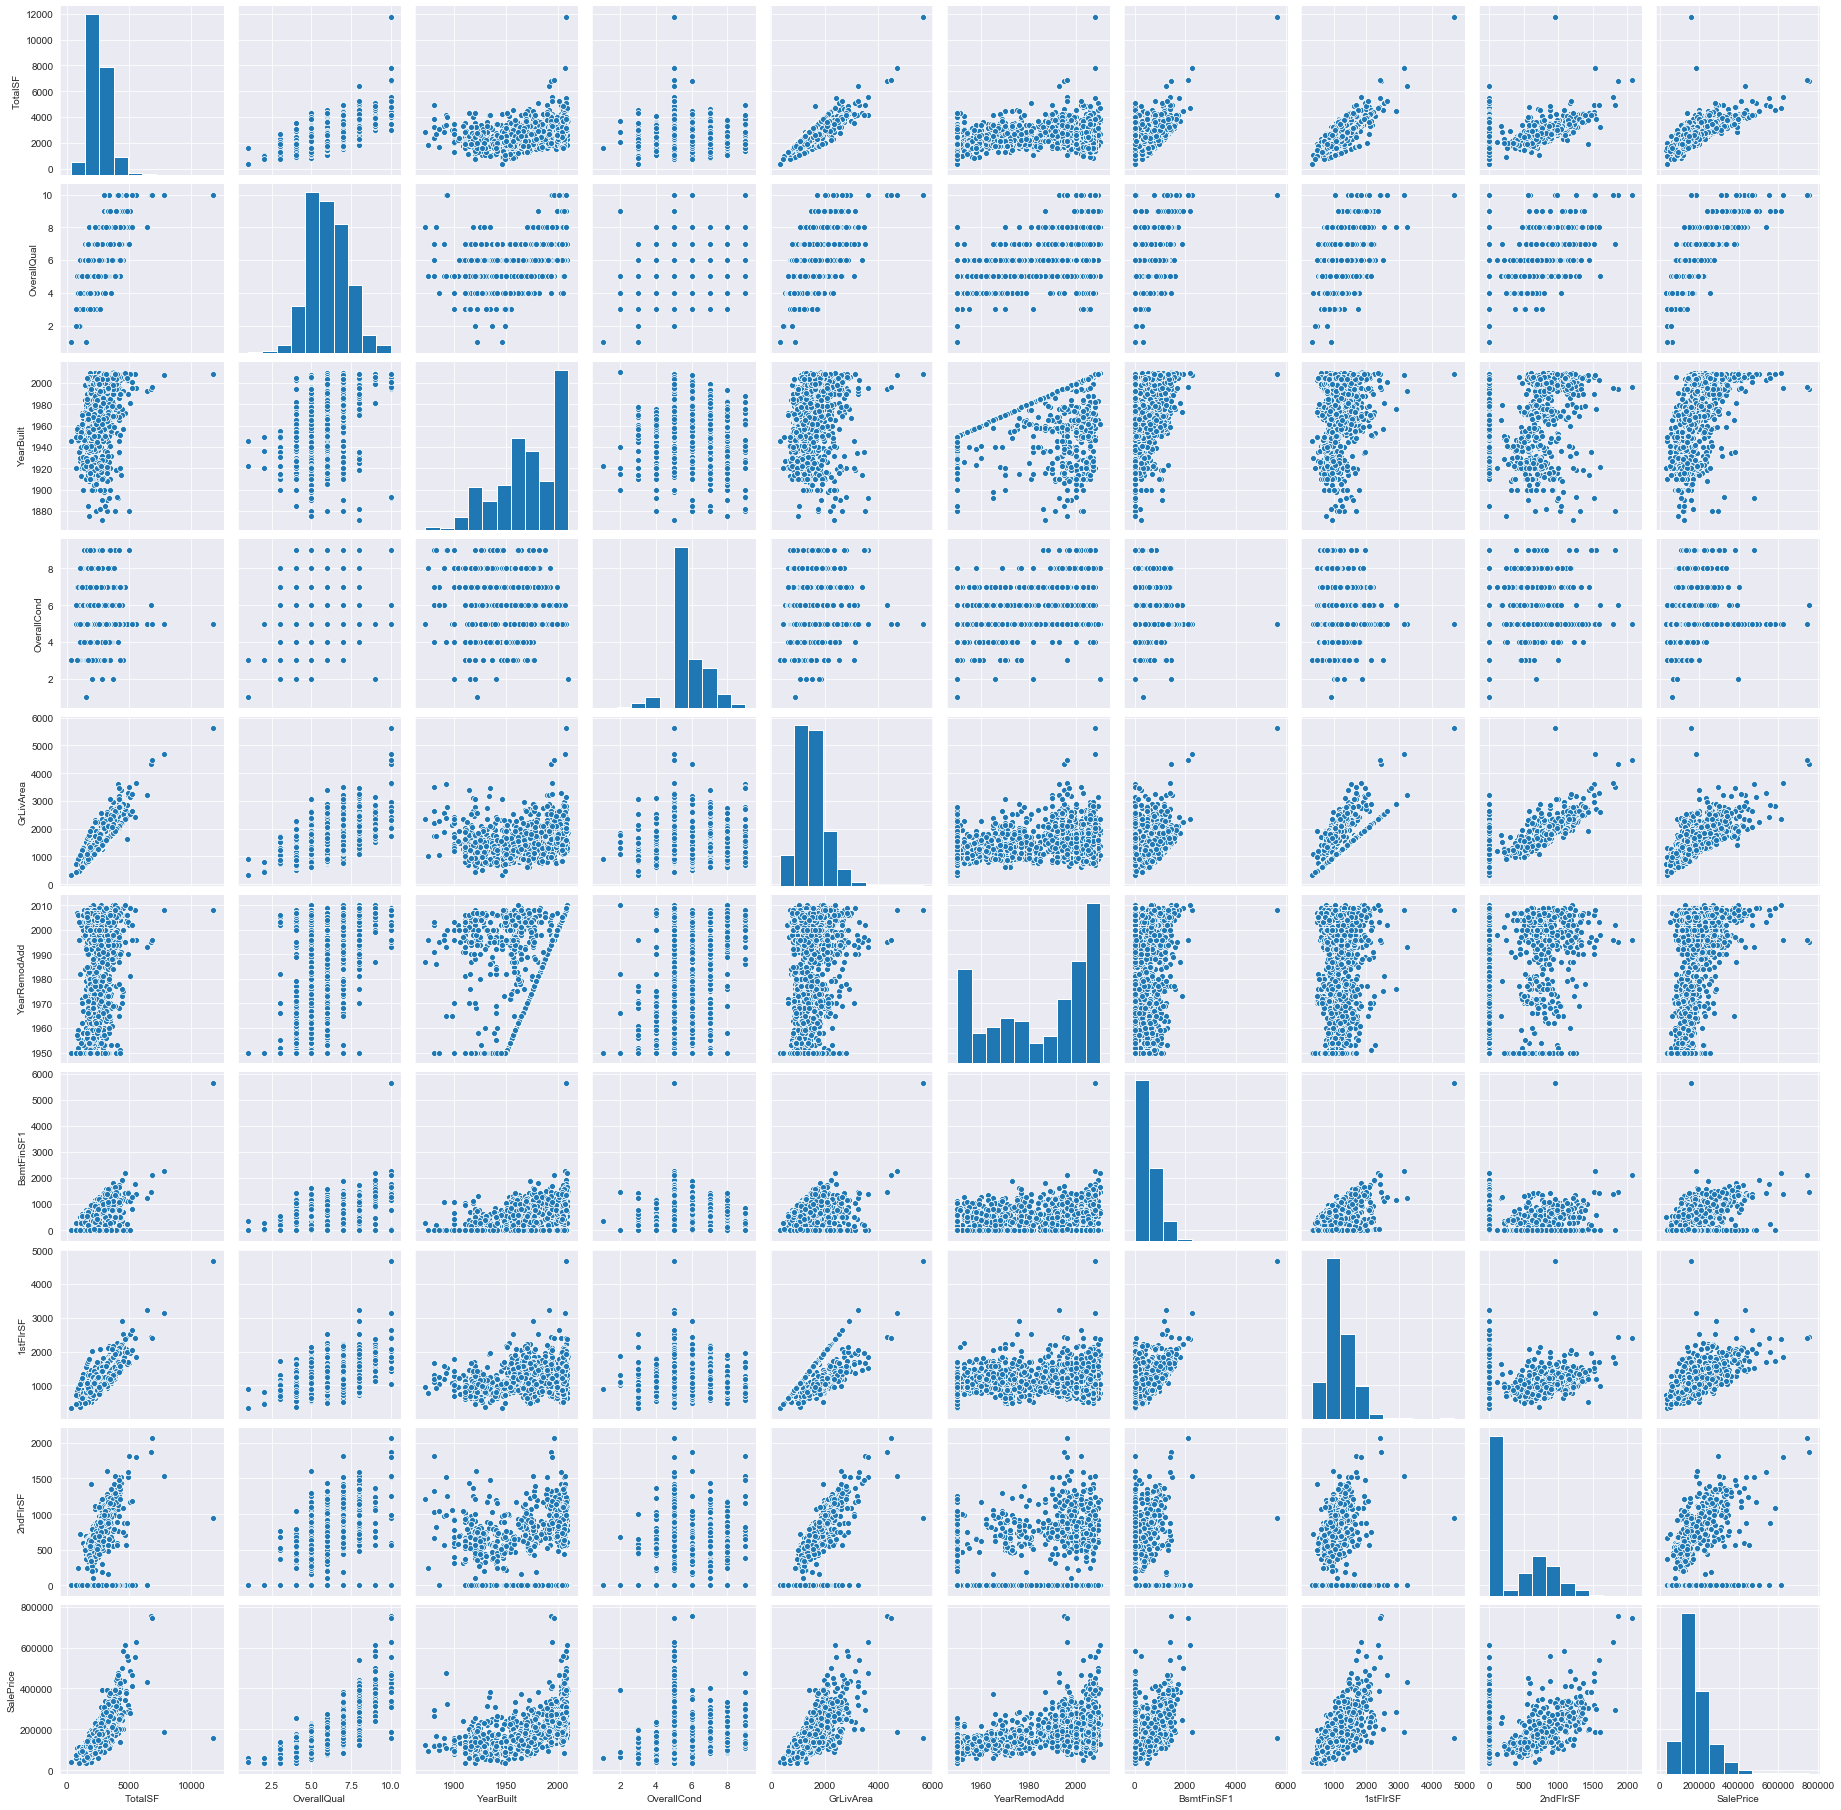

In [173]:
sns.pairplot(train[["TotalSF","OverallQual","YearBuilt","OverallCond","GrLivArea","YearRemodAdd","BsmtFinSF1","1stFlrSF","2ndFlrSF","SalePrice"]])

Next, to clarify the correlation value, a heat map of the correlation between variables is created. Variables that correlate strongly with SalePrice variables are TotalSF, OverallQual, YearBuilt, GrLivArea, YearRemodAdd, and 1stFlrSF. Where these variables are positively correlated and above 0.5 with SalePrice.

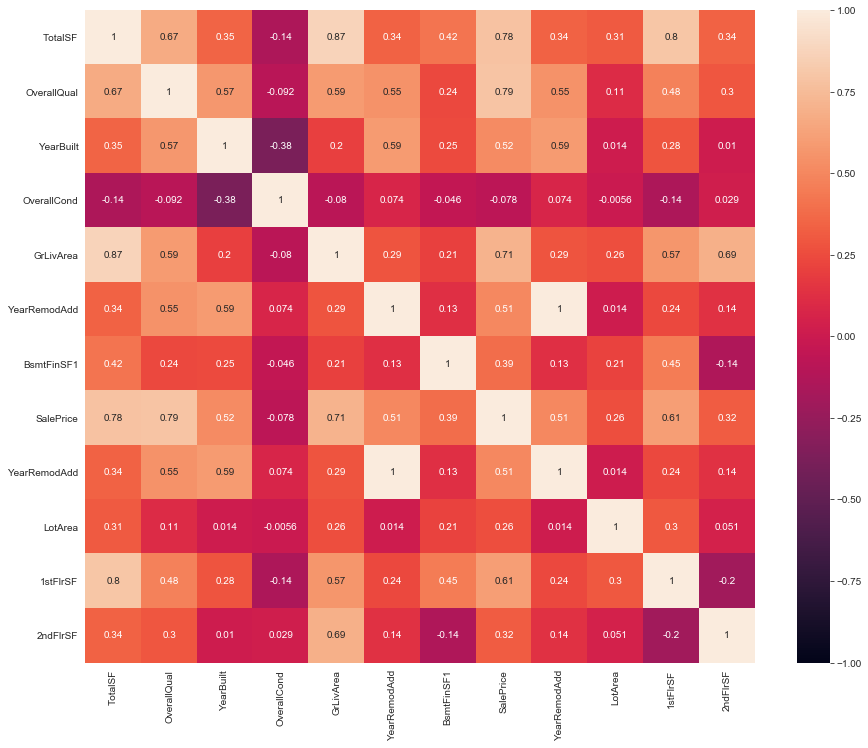

In [174]:
cor=train[["TotalSF","OverallQual","YearBuilt","OverallCond","GrLivArea","YearRemodAdd","BsmtFinSF1","SalePrice","YearRemodAdd","LotArea","1stFlrSF","2ndFlrSF"]].corr()
plt.figure(figsize=(15,12))
sns.heatmap(cor,annot=True,vmin=-1,vmax=1)

**What is the House Style with the most expensive price?**

Two and one-half story: 2nd level finished is a house style with the most expensive average sale price. Two story is a house style with the second most expensive sale price. Whereas One and one-half story: 2nd level unfinished is a house style with the lowest average sale price and even the average sale price is half of the average sale price of Two and one-half story: 2nd level finished.

In [175]:
house_style_price=train.groupby(["HouseStyle"]).agg({"SalePrice":"mean"})
house_style_price=house_style_price.rename(columns={"SalePrice":"Mean Sale Price"})
house_style_price=house_style_price.reset_index().sort_values(["Mean Sale Price"],ascending=False)
house_style_price

,HouseStyle,Mean Sale Price
3,2.5Fin,220000.000000
5,2Story,210051.764045
2,1Story,175985.477961
7,SLvl,166703.384615
4,2.5Unf,157354.545455
0,1.5Fin,143116.740260
6,SFoyer,135074.486486
1,1.5Unf,110150.000000


<Figure size 432x288 with 0 Axes>

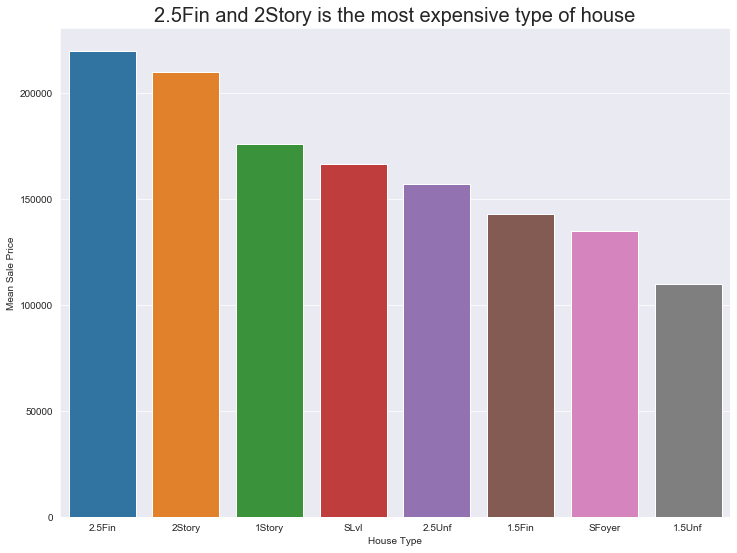

<Figure size 432x288 with 0 Axes>

In [176]:
plt.figure(figsize=(12,9))
sns.barplot(house_style_price["HouseStyle"],house_style_price["Mean Sale Price"])
plt.title("2.5Fin and 2Story is the most expensive type of house",fontdict={'fontsize':20})
plt.xlabel("House Type")
plt.ylabel("Mean Sale Price")
plt.figure()

**Which year is the most expensive house with the highest value built?**

In Data Train, the most recent year for home construction is 2010. Here you can see, houses built in 2010 have the highest average sale price. However, houses built in 2009 have lower average sale prices than houses built in 2008 and old houses built in 1893, 1892, 1989. Here we can conclude that there is a decrease in house prices drastically in 2009. In addition, the old houses built in 1892, 1893 and 1989 were unexpectedly having high sale prices and exceeding the sale prices of houses built in the 2000s.

In [177]:
year_build_price=train.groupby(["YearBuilt"]).agg({"SalePrice":"mean"})
year_build_price=year_build_price.rename(columns={"SalePrice":"Mean Sale Price"})
year_build_price=year_build_price.reset_index()
top_5=year_build_price.sort_values(["Mean Sale Price"],ascending=False).head()
top_5

,YearBuilt,Mean Sale Price
111,2010,394432.000000
109,2008,348849.130435
7,1893,325000.000000
6,1892,291250.000000
90,1989,279500.000000


<Figure size 432x288 with 0 Axes>

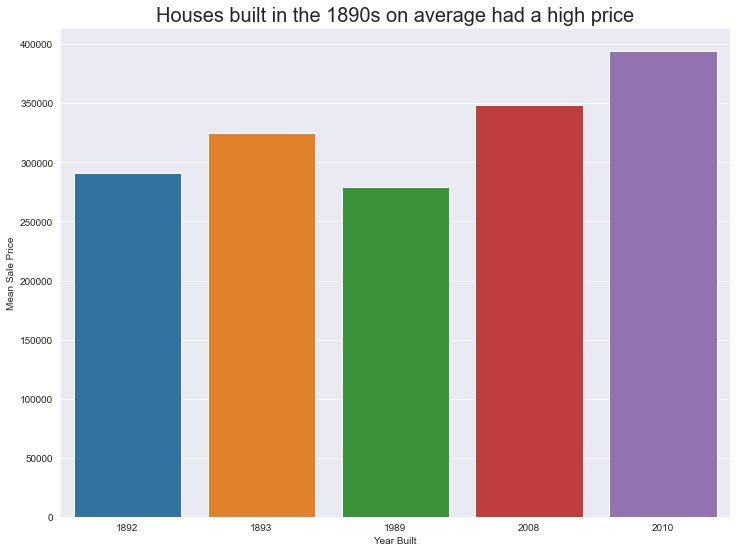

<Figure size 432x288 with 0 Axes>

In [178]:
plt.figure(figsize=(12,9))
sns.barplot(top_5["YearBuilt"].astype(str),top_5["Mean Sale Price"])
plt.title("Houses built in the 1890s on average had a high price",fontdict={'fontsize':20})
plt.xlabel("Year Built")
plt.ylabel("Mean Sale Price")
plt.figure()

**Which sales conditions have the highest average sale price?**

The house was not completed when it was last assessed (related to the new house) or partially had the highest average selling price. Meanwhile houses with sales conditions Adjoining Land Purchases have the lowest average selling prices.

Text(0.5, 1.0, 'Partial Sales Conditions mostly have the highest prices')

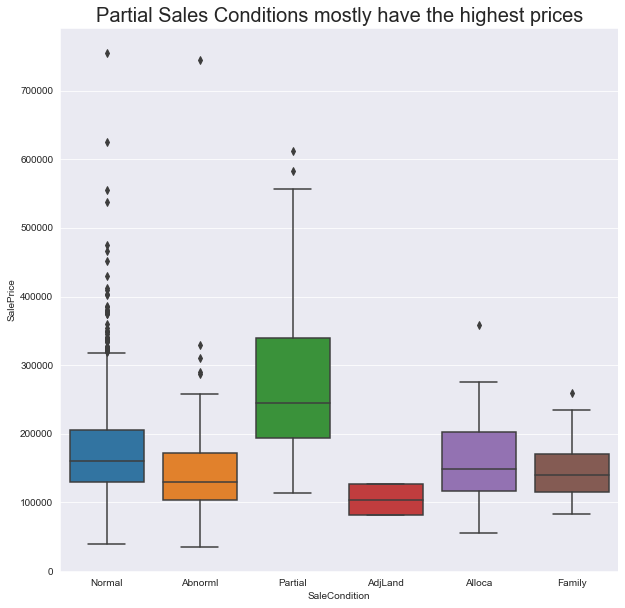

In [179]:
plt.figure(figsize=(10,10))
sns.boxplot(x=train["SaleCondition"],y=train["SalePrice"])
plt.title("Partial Sales Conditions mostly have the highest prices",fontdict={'fontsize':20})

**What is the type of home sales with the highest average sale price?**

Text(0.5, 1.0, 'Types of sales with a 15% contract Advances to regular terms usually have a higher price')

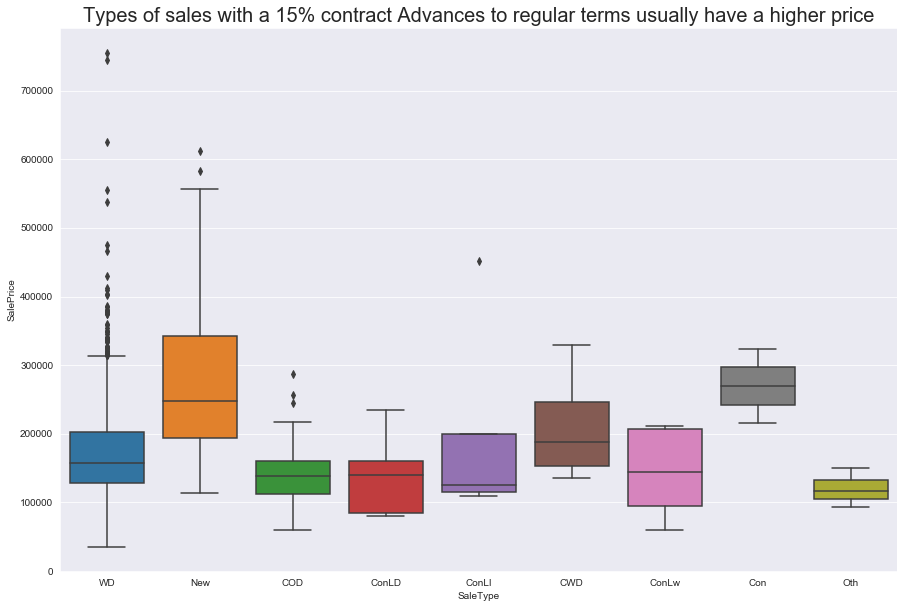

In [180]:
plt.figure(figsize=(15,10))
sns.boxplot(x=train["SaleType"],y=train["SalePrice"])
plt.title("Types of sales with a 15% contract Advances to regular terms usually have a higher price",fontdict={'fontsize':20})

**Does a house with Central air conditioning have a higher average price?**

In [181]:
AC_price=train.groupby(["CentralAir"]).agg({"SalePrice":"mean"})
AC_price=AC_price.rename(columns={"SalePrice":"Mean Sale Price"})
AC_price=AC_price.reset_index()
AC_price

,CentralAir,Mean Sale Price
0,N,105264.073684
1,Y,186186.709890


<Figure size 432x288 with 0 Axes>

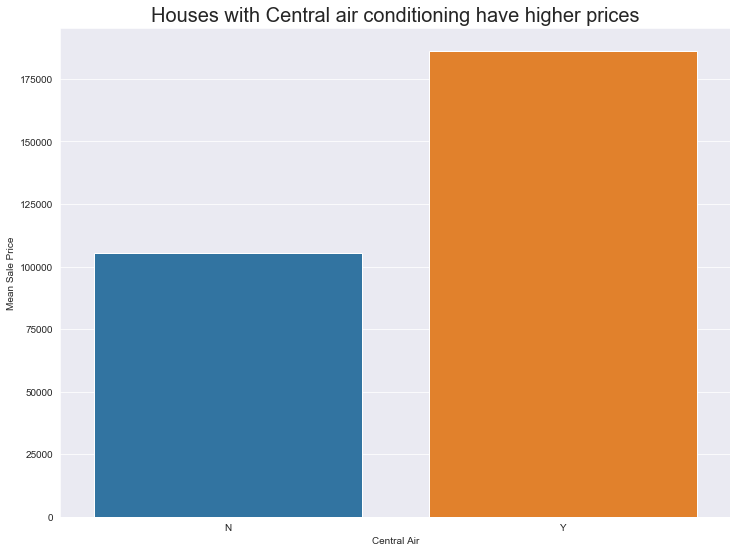

<Figure size 432x288 with 0 Axes>

In [182]:
plt.figure(figsize=(12,9))
sns.barplot(AC_price["CentralAir"],AC_price["Mean Sale Price"])
plt.title("Houses with Central air conditioning have higher prices",fontdict={'fontsize':20})
plt.xlabel("Central Air")
plt.ylabel("Mean Sale Price")
plt.figure()

## Feature Enginer 2

### Transform Category to Numeric

Categorical variables with nominal data types are converted to dummy variables using pandas.get_dummies. The number of dummy variables created is k-1 from k categories, So for example a variable has 3 categories, then the number of dummy variables that are bolted is 3-1 = 2 dummy variables. This must be done in a regression analysis to reduce the effects of multicollinearity on the model. The categories used as baseline values will be explained by the intercept.

In [183]:
from sklearn.preprocessing import LabelEncoder
cat = [x for x in data_all.columns if x not in num.columns]

data_all=pd.get_dummies(data_all,columns=cat,drop_first=True)
data_all.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,0,1,0,0,0,1,0


### Transform Numerical Variable

**Standardization**

Furthermore, independent variables with numerical data types have very different scales. To reduce the dominance of large-scale variables over small-scale variables, the Scaler Standard () is used to standardize these variables. After standardization, these variables will have an average value of 0 and constant variance.

In [184]:
from sklearn.preprocessing import StandardScaler
rs=StandardScaler()
num=num.drop(["SalePrice"],axis=1)
data_all[num.columns]=rs.fit_transform(data_all[num.columns])
data_all[num.columns].describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageYrBlt,GarageCars,GarageArea,TotalSF
count,2.919000e+03,2.919000e+03,2.919000e+03,2.919000e+03,2.919000e+03,2.919000e+03,2.919000e+03,2.919000e+03,2.919000e+03,2.919000e+03,...,2.919000e+03,2.919000e+03,2.919000e+03,2.919000e+03,2.919000e+03,2.919000e+03,2.919000e+03,2.919000e+03,2.919000e+03,2.919000e+03
mean,6.337476e-17,1.652118e-17,2.538413e-16,3.443631e-16,-5.263195e-16,5.481702e-16,-9.829981e-17,-3.418528e-16,-4.082418e-16,1.457477e-16,...,-1.426669e-16,-3.738017e-16,1.787995e-16,-2.577589e-16,2.693594e-16,-8.711771e-17,4.594551e-17,2.285865e-16,-9.394487e-17,1.899816e-16
std,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,...,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00
min,-8.736160e-01,-1.124590e+00,-3.610024e+00,-4.101368e+00,-3.279137e+00,-1.640173e+00,-2.104493e+00,-7.850250e-01,-1.011970e-01,-2.306012e+00,...,-9.687045e-01,-2.930253e-01,-1.275450e+00,-2.383923e+00,-8.189291e-01,-2.497186e-01,-4.159977e+00,-2.317408e+00,-2.193574e+00,-2.749726e+00
25%,-8.736160e-01,-3.411406e-01,-7.725525e-01,-5.072842e-01,-5.881473e-01,-9.221526e-01,-7.228790e-01,-7.850250e-01,-1.011970e-01,-7.406843e-01,...,-9.687045e-01,-2.930253e-01,-7.748986e-01,-5.859205e-01,-8.189291e-01,-2.497186e-01,1.926914e-01,-1.005184e+00,-7.086471e-01,-6.801172e-01
50%,-1.679054e-01,-9.068555e-02,-6.318454e-02,-5.072842e-01,5.570916e-02,4.181525e-01,-1.977638e-01,-7.850250e-01,-1.011970e-01,-1.121815e-01,...,-1.608507e-01,-2.930253e-01,-2.129162e-01,-1.415213e-01,-8.189291e-01,-2.497186e-01,2.371744e-01,3.070398e-01,3.381656e-02,-1.235836e-01
75%,3.025683e-01,1.777769e-01,6.461834e-01,3.912368e-01,9.802210e-01,9.447010e-01,5.809872e-01,8.574248e-01,-1.011970e-01,4.797574e-01,...,6.404173e-01,-2.930253e-01,5.561123e-01,5.681569e-01,1.087334e+00,-2.497186e-01,2.905541e-01,3.070398e-01,4.792948e-01,5.515860e-01
max,3.125411e+00,2.600635e+01,2.774287e+00,3.086800e+00,1.277386e+00,1.231909e+00,1.003179e+01,4.032672e+00,2.283534e+01,8.184846e+00,...,1.142131e+01,8.728547e+00,4.039493e+00,1.146954e+01,4.899860e+00,7.894735e+00,7.487297e-01,4.243712e+00,4.711338e+00,1.143443e+01


**Log Transformation**

In addition, the dependent variable namely SalePrice has right skewed or positive skewed. As linear models love normally distributed data , we need to transform this variable and make it more normally distributed.Therefore a log transformation is performed on SalePrice variables.


 mu = 180921.20 and sigma = 79415.29



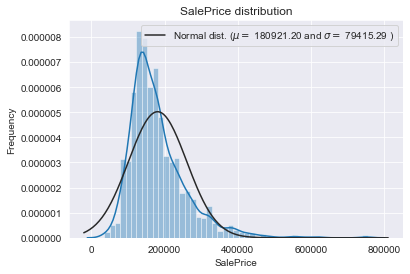

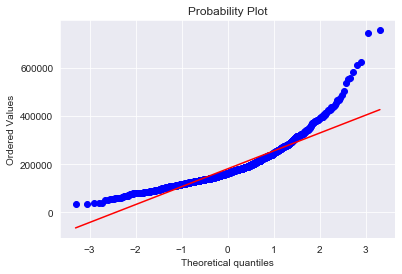

In [185]:
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

Seen after log transformation, the SalePrice variable approaches the normal distribution.


 mu = 12.02 and sigma = 0.40



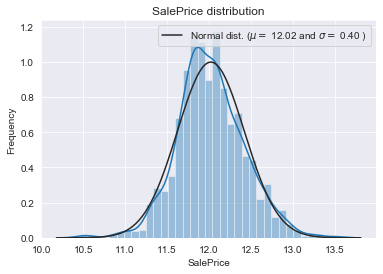

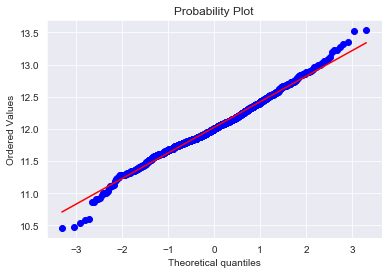

In [186]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"])

#Check the new distribution 
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [187]:
train=pd.concat([data_all.iloc[:len(train),:],train["SalePrice"]],axis=1)
submit=data_all.iloc[len(train):,:]

### Feature Selection using Importance Variable Random Forest

Furthermore, because there are 79 independent variables in the dataset there are 79 feature selection features to choose the variables that have a large and significant effect on the Sale Price. The featured importance of the Random Forest Regressor  and variance inflation factor from multicolinearity check will be used to look for variables that have a major influence on the Sale Price.

**Feature importance Random Forest Regressor**

In [188]:
X=train.drop(["SalePrice"],axis=1)
Y=train.SalePrice
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(max_depth=5, random_state=0)
clf.fit(X, Y)
importance=clf.feature_importances_

In [189]:
importance=pd.DataFrame({"Variabel":X.columns,"Importance":importance})

In this case, the variables chosen are variables that have an importance value of more than 0.005. So there are 9 variables used, namely TotalSF, OverallQual, YearBuilt, OverallCond, GrLivArea, YearRemodAdd, CentralAir_Y, GarageCars, and BsmtFinSF1. These variables are also chosen based on the concept of parsimony or simplicity of the model, where if we only use 9 variables it is able to produce an R-squared adjusted value of 91.3% whereas if all variables are used it will produce an R-Squared adjusted of 92%. Of course it is a very small increase in R-Squared adjusted with the addition of a very large number of variables. Very ineffective and inefficient when using all independent variables.

In [190]:
importance.sort_values(by=['Importance'],ascending=False).head(15)

,Variabel,Importance
3,OverallQual,0.514123
36,TotalSF,0.343810
196,CentralAir_Y,0.019924
25,GarageCars,0.015180
15,GrLivArea,0.010976
5,YearBuilt,0.008245
8,BsmtFinSF1,0.007786
4,OverallCond,0.007020
26,GarageArea,0.006706
6,YearRemodAdd,0.005674


In [191]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
best=["TotalSF","OverallQual","YearBuilt","OverallCond","GrLivArea","YearRemodAdd","CentralAir_Y","GarageCars","BsmtFinSF1"]
X_new=X[best]

**Variance Infaltion Factor (VIF) Multicolinearity Check**

Furthermore, 9 independent variables that have been selected are checked for the value of inflation inflation factor (VIF) to check the multicollinearity of each of these variables. If the VIF value is more than 10, then there is multicollinearity on the variable so that the variable cannot be used to build the model. Meanwhile, if the VIF value is less than 10, then there is no multicollinearity on the variable so that it can be used to build the model. In this case, the 9 selected variables have a VIF value of less than 10. So that the 9 variables chosen fulfill the non-multicollinearity assumption.

In [192]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_new.values, i) for i in range(X_new.shape[1])]
vif["features"] = X_new.columns
vif

,VIF Factor,features
0,6.683489,TotalSF
1,2.768645,OverallQual
2,2.848659,YearBuilt
3,1.448884,OverallCond
4,5.179694,GrLivArea
5,2.026248,YearRemodAdd
6,1.018519,CentralAir_Y
7,1.848275,GarageCars
8,1.416609,BsmtFinSF1


### Drop Outlier using Standarized Residuals

The dataset used in this case has many outliers, so the outliers' values must be handled well. In this case, outlier handling will be used using multivariate methods, namely using standardized residuals from regression analysis. observations that have an absolute value of standardized residuals of more than 2 will be considered as outliers and will be deleted from the dataset.

In [193]:
def outlier(sample):
    Q1=sample.quantile(0.25)
    Q3=sample.quantile(0.75)
    IQR=Q3-Q1
    lower_range = Q1 -(1.5 * IQR)
    upper_range = Q3 +(1.5 * IQR)
    number_outlier=len(sample[sample>upper_range])+len(sample[sample<lower_range])
    print("{}".format(number_outlier))

In [194]:
column=num.columns
summary_outlier=[]
for col in column :
    print(col)
    pencilan=outlier(train[col])
    summary_outlier.append(pencilan)

MSSubClass
103
LotArea
69
OverallQual
2
OverallCond
125
YearBuilt
7
YearRemodAdd
0
1stFlrSF
20
2ndFlrSF
2
LowQualFinSF
26
GrLivArea
31
FullBath
0
HalfBath
0
BedroomAbvGr
35
KitchenAbvGr
68
TotRmsAbvGrd
30
Fireplaces
5
WoodDeckSF
32
OpenPorchSF
77
EnclosedPorch
208
3SsnPorch
24
ScreenPorch
116
PoolArea
7
MiscVal
52
MoSold
0
YrSold
0
LotFrontage
99
MasVnrArea
98
BsmtFinSF1
7
BsmtFinSF2
167
BsmtUnfSF
29
TotalBsmtSF
61
BsmtFullBath
1
BsmtHalfBath
82
GarageYrBlt
81
GarageCars
5
GarageArea
21
TotalSF
25


In [195]:
X2 = sm.add_constant(X_new)
est = sm.OLS(Y, X2)
est2 = est.fit()
influence = est2.get_influence()
standardized_residuals = influence.resid_studentized_internal
standardized_residuals=pd.DataFrame({"standardized_residuals":abs(standardized_residuals)})
delete=standardized_residuals.sort_values(['standardized_residuals'],ascending=False).head(50)

In [196]:
idx=list(delete.index)
X_new=X_new.drop(idx,axis=0)
Y_new=Y.drop(idx,axis=0)

## Modelling

The next step is to do modeling. There are 9 models to be built in this case, namely linear regression, support vector regression with linear kernel, support vector regression with kernel RBF, Lasso Regression, Kernel Ridge Regression, Elastic Net Regression, Gradient Boosting Regression, Extreme Gradient Boosting Regression and Light Gradient Boosting Machine Regression.

In [197]:
from sklearn.linear_model import ElasticNet, Lasso, BayesianRidge, LassoLarsIC, LinearRegression
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

The dataset will be divided into training, validation and testing data. 80% of the data is used as training data and validation using the 5-fold cross validation partition method, while the other 20% is used as testing data. Next, the evaluation metrics to be used are R-squared, MSE, MAE and MSLE.

In [198]:
#Validation function
x_train,x_test,y_train,y_test=train_test_split(X_new,Y_new,test_size=0.2,random_state=99)
n_folds = 5

def model_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42)
    r2= cross_val_score(model, x_train, y_train, cv = kf,scoring="r2").mean()
    mse= -cross_val_score(model, x_train, y_train, cv = kf,scoring="neg_mean_squared_error").mean()
    mae= -cross_val_score(model, x_train, y_train, cv = kf,scoring='neg_mean_absolute_error').mean()
    print("R Square : {}, MSE : {}, MAE : {}.".format(r2,mse,mae))

The next step is to define the models that will be used. Hyperparameter values used in each model are not tuned using grid search, random search and Bayesian search because computing time is too long and the increase is not too significant.

In [199]:
lr=LinearRegression()
lasso =Lasso(alpha =0.0005, random_state=1)
ENet =ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3)
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
svr_linear=SVR(kernel="linear",C=1.0)
svr_rbf=SVR(kernel="rbf",gamma='scale',C=1.0)
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

### Linear Regression

Following are the mean values of R-Squared, MSE and MAE of the 5-fold cross validation in the linear regression model.

Based on the above output, we can see that the MAE value of the model is 0.0859, the MSE is 0.01238 and the R-Squared value is 91.12%, which means as much as 91.12% of the Sale Price variability can be explained by the nine independent variables. While the remaining 8.88% is influenced by other variables outside the model.

In [200]:
score_lr = model_cv(lr)

R Square : 0.9111691394926137, MSE : 0.012387207209250635, MAE : 0.08599349163934192.


In [201]:
X_train2 = sm.add_constant(x_train)
est = sm.OLS(y_train, X_train2)
est2 = est.fit()

In [202]:
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     1314.
Date:                Sat, 16 May 2020   Prob (F-statistic):               0.00
Time:                        19:16:57   Log-Likelihood:                 888.03
No. Observations:                1128   AIC:                            -1756.
Df Residuals:                    1118   BIC:                            -1706.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           11.9704      0.015    803.939   

**Simultaneous Test F distribution** <br>
i.&ensp;Hypothesis testing <br>
&emsp; H_0: Regression coefficient has no significant effect on the model <br>
&emsp; H_1: at least one regression coefficient that has a significant effect on the model <br>
ii.  Significance level α = 5% <br>
iii. Critical Area: is rejected if the Prob (F-statistic) <α = 0.05 <br>
iv.  Test Statistics <br>
&emsp; Prob (F-statistic) = 0.00 <br>
v.   Conclusion: Simultaneously there is at least one regression coefficient that has a significant effect on the model.

**Partial Test t distribution** <br>
i.&ensp;Hypothesis testing <br>
&emsp; H_0: The regression coefficient has no significant effect on the model <br>
&emsp; H_1: The regression coefficient has a significant effect on the model <br>
ii.  Significance level α = 5% <br>
iii. Critical Area: is rejected if the Prob (t-statistic) <α = 0.05 <br>
iv.  Test Statistics <br>
&emsp; All independent variables and constant have Prob (t-statistic) = 0.00 <br>
v.   Conclusion: All regression coefficients have a significant effect on the model

**Regression Equation** <br>
log(SalePrice)=11.9704 + 0.1194 * TotalSF + 0.1039 * OverallQual + 0.0819 * YearBuilt + 0.0515 * OverallCond + 0.0748 * GrLivArea + 0.0205 * YearRemodAdd + 0.0595 * CentralAir_Yes + 0.0516 * GarageCars + 0.0435 * BsmtFinSF1

#### Asumption Test

**Normality Test (Jarque Bera Test)** <br>
i.&ensp;Hypothesis testing <br>
&emsp; H_0: residuals are normally distributed <br>
&emsp; H_1: residuals are not normally distributed <br>
ii.  Significance level α = 5% <br>
iii. Critical Area: is rejected if the Prob (JB) <α = 0.05 <br>
iv.  Test Statistics <br>
&emsp;  Prob (JB) = 0.000163 <br>
v.   Conclusion: residuals are not normally distributed

**Autocorellation Test (Durbin Watson Test)** <br>
i.&ensp;Hypothesis testing <br>
&emsp; H_0: there is no autocorrelation between residuals <br>
&emsp; H_1: there is autocorrelation between residuals <br>
ii.  Significance level α = 5% <br>
iii. Critical Area: is rejected if DW>1.890 or DW<1.861 <br>
iv.  Test Statistics <br>
&emsp;  DW = 1.960 <br>
v.   Conclusion: there is autocorrelation between residuals

**Heterocesdasticity Test (White Test)** <br>
i.&ensp;Hypothesis testing <br>
&emsp; H_0: the variance of residuals is homogeneous <br>
&emsp; H_1: the variance of residuals is heterogeneous <br>
ii.  Significance level α = 5% <br>
iii. Critical Area: is rejected if LM test's p-value or F-test's p-value <α = 0.05 <br>
iv.  Test Statistics <br>
&emsp;  LM test's p-value = 0.0000 <br>
&emsp;  F-test's p-value = 0.0000 <br>
v.   Conclusion: the variance of residuals is heterogeneous

In [203]:
from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip

In [204]:
keys = ['Lagrange Multiplier statistic:', 'LM test\'s p-value:', 'F-statistic:', 'F-test\'s p-value:']
hetero=het_white(est2.resid,X_train2)
lzip(keys,hetero)

[('Lagrange Multiplier statistic:', 178.81823191732502),
 ("LM test's p-value:", 1.5049821884417572e-15),
 ('F-statistic:', 3.8176035031978044),
 ("F-test's p-value:", 2.886859635967055e-17)]

**Multicolinearity Test** <br>
Furthermore, 9 independent variables that have been selected are checked for the value of inflation inflation factor (VIF) to check the multicollinearity of each of these variables. If the VIF value is more than 10, then there is multicollinearity on the variable so that the variable cannot be used to build the model. Meanwhile, if the VIF value is less than 10, then there is no multicollinearity on the variable so that it can be used to build the model. In this case, the 9 selected variables have a VIF value of less than 10. So that the 9 variables chosen fulfill the non-multicollinearity assumption.

In [205]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_new.values, i) for i in range(X_new.shape[1])]
vif["features"] = X_new.columns
vif

,VIF Factor,features
0,6.123397,TotalSF
1,2.717319,OverallQual
2,2.833293,YearBuilt
3,1.451158,OverallCond
4,4.815185,GrLivArea
5,2.017568,YearRemodAdd
6,1.018918,CentralAir_Y
7,1.864139,GarageCars
8,1.315582,BsmtFinSF1


**Evaluation Metrics in Test Data**

In [206]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_squared_log_error
pred_lr=est2.predict(sm.add_constant(x_test))

Based on the test data, we can see that the MAE value of the model is 0.0824, the MSE is 0.0111, the MSLE is 0.000065 and the R-Squared value is 92.78%, which means as much as 92.78% of the Sale Price variability in test data can be explained by the nine independent variables. While the remaining 7.22% is influenced by other variables outside the model.

In [207]:
r2_score(y_test,pred_lr)

0.9277671619651762

In [208]:
mean_squared_error(y_test,pred_lr)

0.011195863356922698

In [209]:
mean_absolute_error(y_test,pred_lr)

0.08240342202890907

In [210]:
mean_squared_log_error(y_test,pred_lr)

6.589439570907277e-05

### SVR Linear

Following are the mean values of R-Squared, MSE and MAE of the 5-fold cross validation in the SVR Linear model.

Based on the above output, we can see that the MAE value of the model is 0.0859, the MSE is 0.01247 and the R-Squared value is 91.06%, which means as much as 91.06% of the Sale Price variability can be explained by the nine independent variables. While the remaining 8.94% is influenced by other variables outside the model.

In [211]:
score_svrlinear=model_cv(svr_linear)

R Square : 0.9105915541830228, MSE : 0.012470963598653842, MAE : 0.08595488377890684.


**Evaluation Metrics in Test Data**

In [212]:
svr_linear.fit(x_train,y_train)
pred_svr_linear=svr_linear.predict(x_test)

Based on the test data, we can see that the MAE value of the model is 0.0829, the MSE is 0.01130, the MSLE is 0.000066 and the R-Squared value is 92.71%, which means as much as 92.71% of the Sale Price variability in test data can be explained by the nine independent variables. While the remaining 7.29% is influenced by other variables outside the model.

In [213]:
r2_score(y_test,pred_svr_linear)

0.9270251042076901

In [214]:
mean_squared_error(y_test,pred_svr_linear)

0.0113108799820725

In [215]:
mean_absolute_error(y_test,pred_svr_linear)

0.08295810979308439

In [216]:
mean_squared_log_error(y_test,pred_svr_linear)

6.664092171617105e-05

### SVR RBF

Following are the mean values of R-Squared, MSE and MAE of the 5-fold cross validation in the SVR Rbf model.

Based on the above output, we can see that the MAE value of the model is 0.0915, the MSE is 0.0151 and the R-Squared value is 89.22%, which means as much as 89.22% of the Sale Price variability can be explained by the nine independent variables. While the remaining 10.78% is influenced by other variables outside the model.

In [217]:
score_svrrbf=model_cv(svr_rbf)

R Square : 0.8917386142227258, MSE : 0.015234619665739368, MAE : 0.09168612485611058.


**Evaluation Metrics in Test Data**

In [218]:
svr_rbf.fit(x_train,y_train)
pred_svr_rbf=svr_rbf.predict(x_test)

Based on the test data, we can see that the MAE value of the model is 0.0806, the MSE is 0.01263, the MSLE is 0.000073 and the R-Squared value is 91.85%, which means as much as 91.85% of the Sale Price variability in test data can be explained by the nine independent variables. While the remaining 8.15% is influenced by other variables outside the model.

In [219]:
r2_score(y_test,pred_svr_rbf)

0.9183514940983266

In [220]:
mean_squared_error(y_test,pred_svr_rbf)

0.012655262346625874

In [221]:
mean_absolute_error(y_test,pred_svr_rbf)

0.08065159430136327

In [222]:
mean_squared_log_error(y_test,pred_svr_rbf)

7.31810867271605e-05

### Lasso Regression

Following are the mean values of R-Squared, MSE and MAE of the 5-fold cross validation in the Lasso regression model.

Based on the above output, we can see that the MAE value of the model is 0.0859, the MSE is 0.01239 and the R-Squared value is 91.11%, which means as much as 91.11% of the Sale Price variability can be explained by the nine independent variables. While the remaining 8.89% is influenced by other variables outside the model.

In [223]:
score_lasso = model_cv(lasso)

R Square : 0.9111398970900477, MSE : 0.012392585037443653, MAE : 0.08596181968240538.


**Evaluation Metrics in Test Data**

In [224]:
lasso.fit(x_train,y_train)
pred_lasso=lasso.predict(x_test)

Based on the test data, we can see that the MAE value of the model is 0.0824, the MSE is 0.0112, the MSLE is 0.000066 and the R-Squared value is 92.76%, which means as much as 92.76% of the Sale Price variability in test data can be explained by the nine independent variables. While the remaining 7.24% is influenced by other variables outside the model.

In [225]:
r2_score(y_test,pred_lasso)

0.9275594211877974

In [226]:
mean_squared_error(y_test,pred_lasso)

0.011228062525894453

In [227]:
mean_absolute_error(y_test,pred_lasso)

0.08240161545415976

In [228]:
mean_squared_log_error(y_test,pred_lasso)

6.611524403387667e-05

### Elastic Net

Following are the mean values of R-Squared, MSE and MAE of the 5-fold cross validation in the Elastic Net regression model.

Based on the above output, we can see that the MAE value of the model is 0.0859, the MSE is 0.01239 and the R-Squared value is 91.11%, which means as much as 91.11% of the Sale Price variability can be explained by the nine independent variables. While the remaining 8.89% is influenced by other variables outside the model.

In [229]:
score_ElasticNet = model_cv(ENet)

R Square : 0.9111460973158929, MSE : 0.012391594448108442, MAE : 0.0859638337071965.


**Evaluation Metrics in Test Data**

In [230]:
ENet.fit(x_train,y_train)
pred_ENet=ENet.predict(x_test)

Based on the test data, we can see that the MAE value of the model is 0.0824, the MSE is 0.0112, the MSLE is 0.000066 and the R-Squared value is 92.76%, which means as much as 92.76% of the Sale Price variability in test data can be explained by the nine independent variables. While the remaining 7.24% is influenced by other variables outside the model.

In [231]:
r2_score(y_test,pred_ENet)

0.9275820842625588

In [232]:
mean_squared_error(y_test,pred_ENet)

0.011224549820382948

In [233]:
mean_absolute_error(y_test,pred_ENet)

0.08239472844718063

In [234]:
mean_squared_log_error(y_test,pred_ENet)

6.60915039248035e-05

### Kernel Ridge

Following are the mean values of R-Squared, MSE and MAE of the 5-fold cross validation in the Kernel Ridge regression model.

Based on the above output, we can see that the MAE value of the model is 0.0850, the MSE is 0.0120 and the R-Squared value is 91.32%, which means as much as 91.32% of the Sale Price variability can be explained by the nine independent variables. While the remaining 8.68% is influenced by other variables outside the model.

In [235]:
score_KernelRidge = model_cv(KRR)

R Square : 0.9132293546977157, MSE : 0.012088389025040409, MAE : 0.08502982801722136.


**Evaluation Metrics in Test Data**

In [236]:
KRR.fit(x_train,y_train)
pred_KRR=KRR.predict(x_test)

Based on the test data, we can see that the MAE value of the model is 0.077, the MSE is 0.0098, the MSLE is 0.000058 and the R-Squared value is 93.67%, which means as much as 93.67% of the Sale Price variability in test data can be explained by the nine independent variables. While the remaining 6.33% is influenced by other variables outside the model.

In [237]:
r2_score(y_test,pred_KRR)

0.9367100954191543

In [238]:
mean_squared_error(y_test,pred_KRR)

0.009809736718612821

In [239]:
mean_absolute_error(y_test,pred_KRR)

0.07694460273724657

In [240]:
mean_squared_log_error(y_test,pred_KRR)

5.787993230398103e-05

### Gradient Boosting

Following are the mean values of R-Squared, MSE and MAE of the 5-fold cross validation in the Gradient Boosting regression model.

Based on the above output, we can see that the MAE value of the model is 0.0915, the MSE is 0.0144 and the R-Squared value is 89.65%, which means as much as 89.65% of the Sale Price variability can be explained by the nine independent variables. While the remaining 10.35% is influenced by other variables outside the model.

In [241]:
score_Gradient_Boosting = model_cv(GBoost)

R Square : 0.8961876363584624, MSE : 0.01449638180122408, MAE : 0.09165642412226024.


**Evaluation Metrics in Test Data**

In [242]:
GBoost.fit(x_train,y_train)
pred_GBoost=GBoost.predict(x_test)

Based on the test data, we can see that the MAE value of the model is 0.0839, the MSE is 0.0122, the MSLE is 0.000072 and the R-Squared value is 92.11%, which means as much as 92.11% of the Sale Price variability in test data can be explained by the nine independent variables. While the remaining 7.89% is influenced by other variables outside the model.

In [243]:
r2_score(y_test,pred_GBoost)

0.9213488924965952

In [244]:
mean_squared_error(y_test,pred_GBoost)

0.012190674995411786

In [245]:
mean_absolute_error(y_test,pred_GBoost)

0.0837550495813389

In [246]:
mean_squared_log_error(y_test,pred_GBoost)

7.176168470023465e-05

### XGBOOST

Following are the mean values of R-Squared, MSE and MAE of the 5-fold cross validation in the Extreme Gradient Boosting regression model.

Based on the above output, we can see that the MAE value of the model is 0.0847, the MSE is 0.0122 and the R-Squared value is 91.23%, which means as much as 91.23% of the Sale Price variability can be explained by the nine independent variables. While the remaining 8.77% is influenced by other variables outside the model.

In [247]:
score_Xgboost = model_cv(model_xgb)

R Square : 0.9123533805473591, MSE : 0.012250105602794182, MAE : 0.08482716584542857.


**Evaluation Metrics in Test Data**

In [248]:
model_xgb.fit(x_train,y_train)
pred_model_xgb=model_xgb.predict(x_test)

Based on the test data, we can see that the MAE value of the model is 0.0784, the MSE is 0.0103, the MSLE is 0.000061 and the R-Squared value is 93.34%, which means as much as 93.34% of the Sale Price variability in test data can be explained by the nine independent variables. While the remaining 6.66% is influenced by other variables outside the model.

In [249]:
r2_score(y_test,pred_model_xgb)

0.9338582429614579

In [250]:
mean_squared_error(y_test,pred_model_xgb)

0.010251764905503098

In [251]:
mean_absolute_error(y_test,pred_model_xgb)

0.0783392436280902

In [252]:
mean_squared_log_error(y_test,pred_model_xgb)

6.0369962442614826e-05

### LIGHT GBM

Following are the mean values of R-Squared, MSE and MAE of the 5-fold cross validation in the light gradient boosting machine regression model.

Based on the above output, we can see that the MAE value of the model is 0.0858, the MSE is 0.0125 and the R-Squared value is 91.02%, which means as much as 91.02% of the Sale Price variability can be explained by the nine independent variables. While the remaining 8.98% is influenced by other variables outside the model.

In [253]:
score_LGBM = model_cv(model_lgb)

R Square : 0.9100529907032705, MSE : 0.012600179668220541, MAE : 0.08588580661013107.


**Evaluation Metrics in Test Data**

In [254]:
model_lgb.fit(x_train,y_train)
pred_model_lgb=model_lgb.predict(x_test)

Based on the test data, we can see that the MAE value of the model is 0.077, the MSE is 0.0104, the MSLE is 0.000063 and the R-Squared value is 93.32%, which means as much as 93.32% of the Sale Price variability in test data can be explained by the nine independent variables. While the remaining 6.68% is influenced by other variables outside the model.

In [255]:
r2_score(y_test,pred_model_lgb)

0.9308673221500487

In [256]:
mean_squared_error(y_test,pred_model_lgb)

0.010715348251069136

In [257]:
mean_absolute_error(y_test,pred_model_lgb)

0.07780312473812004

In [258]:
mean_squared_log_error(y_test,pred_model_lgb)

6.329567833339122e-05

## The Best Model

The best Model is Kernel Ridge Regression

### Submission

Submission using the best model

In [259]:
submit=submit[best]
submission=KRR.predict(submit)
submission=np.expm1(submission)
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = submission
sub.to_csv('submission.csv',index=False)